# **Exploratory Data Analysis**


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 146.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 133.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
# calculate missing values to check if it is okay to drop the empty rows or imputation should be done 
print(f"Missing values in 'Employment': {df["Employment"].isnull().sum()}")
print(f"Missing values in 'JobSat': {df["JobSat"].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df["RemoteWork"].isnull().sum()}")
print(f"Missing values in 'YearsCodePro': {df["YearsCodePro"].isnull().sum()}")

Missing values in 'Employment': 0
Missing values in 'JobSat': 36311
Missing values in 'RemoteWork': 10631
Missing values in 'YearsCodePro': 13827


In [13]:
# There is no empty value in 'Employment'
# Imputing 'RemoteWork' with the most frequent value
most_freq = df["RemoteWork"].value_counts().idxmax()

df["RemoteWork"] = df["RemoteWork"].fillna(most_freq)
# Drop empty rows in JobSat and YearsCodePro (critical columns) for analysis
df = df.dropna(subset=["JobSat", "YearsCodePro"])


In [10]:
# After dropping and imputation, number of missing rows
print(f"Missing values in 'Employment': {df["Employment"].isnull().sum()}")
print(f"Missing values in 'JobSat': {df["JobSat"].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df["RemoteWork"].isnull().sum()}")
print(f"Missing values in 'YearsCodePro': {df["YearsCodePro"].isnull().sum()}")

Missing values in 'Employment': 0
Missing values in 'JobSat': 0
Missing values in 'RemoteWork': 0
Missing values in 'YearsCodePro': 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [16]:
#Finding the unique values and its counts of 'JobSat' and 'YearsCodePro'
print(f"Value counts in 'JobSat': \n{df["JobSat"].value_counts()}")
print(f"Value counts in 'YearsCodePro': \n{df["YearsCodePro"].value_counts()}")

Value counts in 'JobSat': 
JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64
Value counts in 'YearsCodePro': 
YearsCodePro
3                     2261
2                     2153
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     819
11                     806
Less than 1 year       780
13                     703
14                     629
16                     577
18                     526
25                     505
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                    

In [19]:
#Create experience ranges for YearsCodePro by Binning
df["YearsCodePro"] = df["YearsCodePro"].replace("Less than 1 year",0).replace("More than 50 years", 55)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')
bins = [0, 5, 10, 20, float("inf")]
labels = ["0–5 years", "5–10 years", "10–20 years", ">20 years"]

df["ExperienceRange"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)

In [20]:
#Checking the values of 'YearsCodePro' after binning
df["ExperienceRange"].value_counts()

ExperienceRange
0–5 years      8233
10–20 years    7998
5–10 years     7835
>20 years      4290
Name: count, dtype: int64

In [25]:
#median JobSat for each range
median_satisfaction = df.groupby("ExperienceRange")["JobSat"].median().reset_index()
median_satisfaction

/tmp/ipykernel_298/1343625986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby("ExperienceRange")["JobSat"].median().reset_index()


,ExperienceRange,JobSat
0,0–5 years,7.0
1,5–10 years,7.0
2,10–20 years,7.0
3,>20 years,8.0


/tmp/ipykernel_298/3344956994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x="ExperienceRange", y="JobSat", palette="Blues_d")


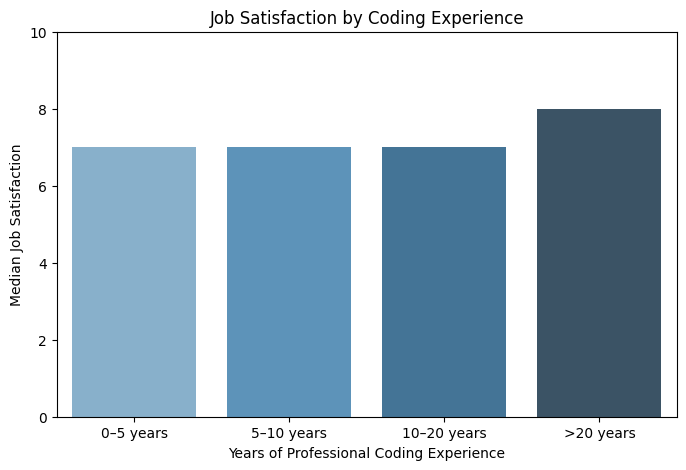

In [30]:
#Visualize the relationship using a bar plot or similar visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=median_satisfaction, x="ExperienceRange", y="JobSat", palette="Blues_d")
plt.ylabel("Median Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.title("Job Satisfaction by Coding Experience")
plt.ylim(0, 10)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


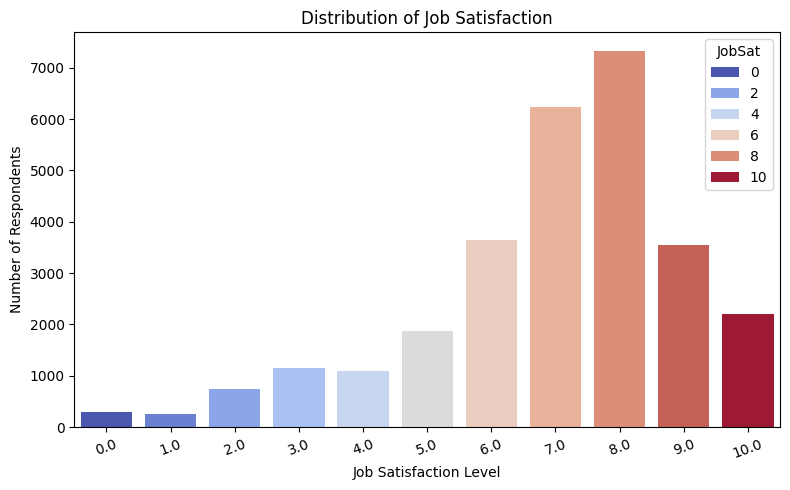

In [33]:
# count plot to show the distribution of JobSat values
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="JobSat",hue="JobSat", palette="coolwarm")

plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


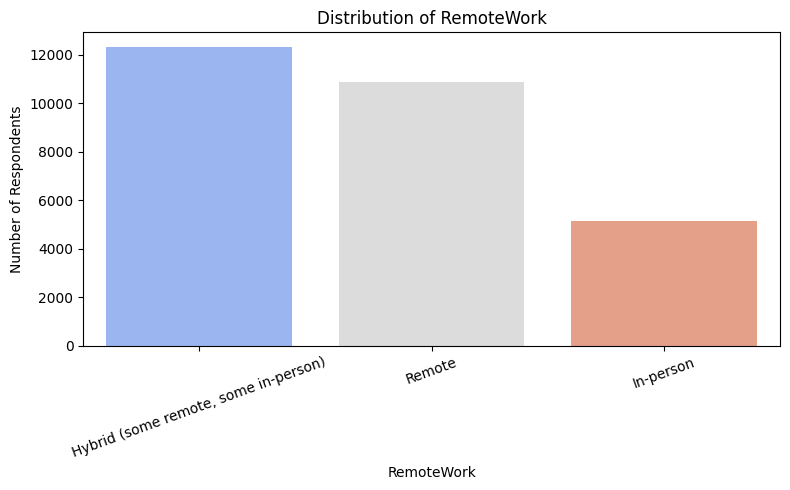

In [34]:
#count plot to show remote work distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="RemoteWork",hue="RemoteWork", palette="coolwarm")

plt.title("Distribution of RemoteWork")
plt.xlabel("RemoteWork")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [36]:
#Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles
cross_tab = pd.crosstab(index=[df["Employment"], df["DevType"]], columns=[df["RemoteWork"]], margins=True, margins_name="Total")
print(cross_tab)

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             156   
                                       Blockchain                                                       10   
                                       Cloud infrastructure engineer                                   116   
                                       Data engineer                                                   270   
                                       Data or business analyst                                         87   
...                                                                                                    ...   
Student, part-time;Employed, part-time Scientist                                                         1   
          

/tmp/ipykernel_298/3296404833.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


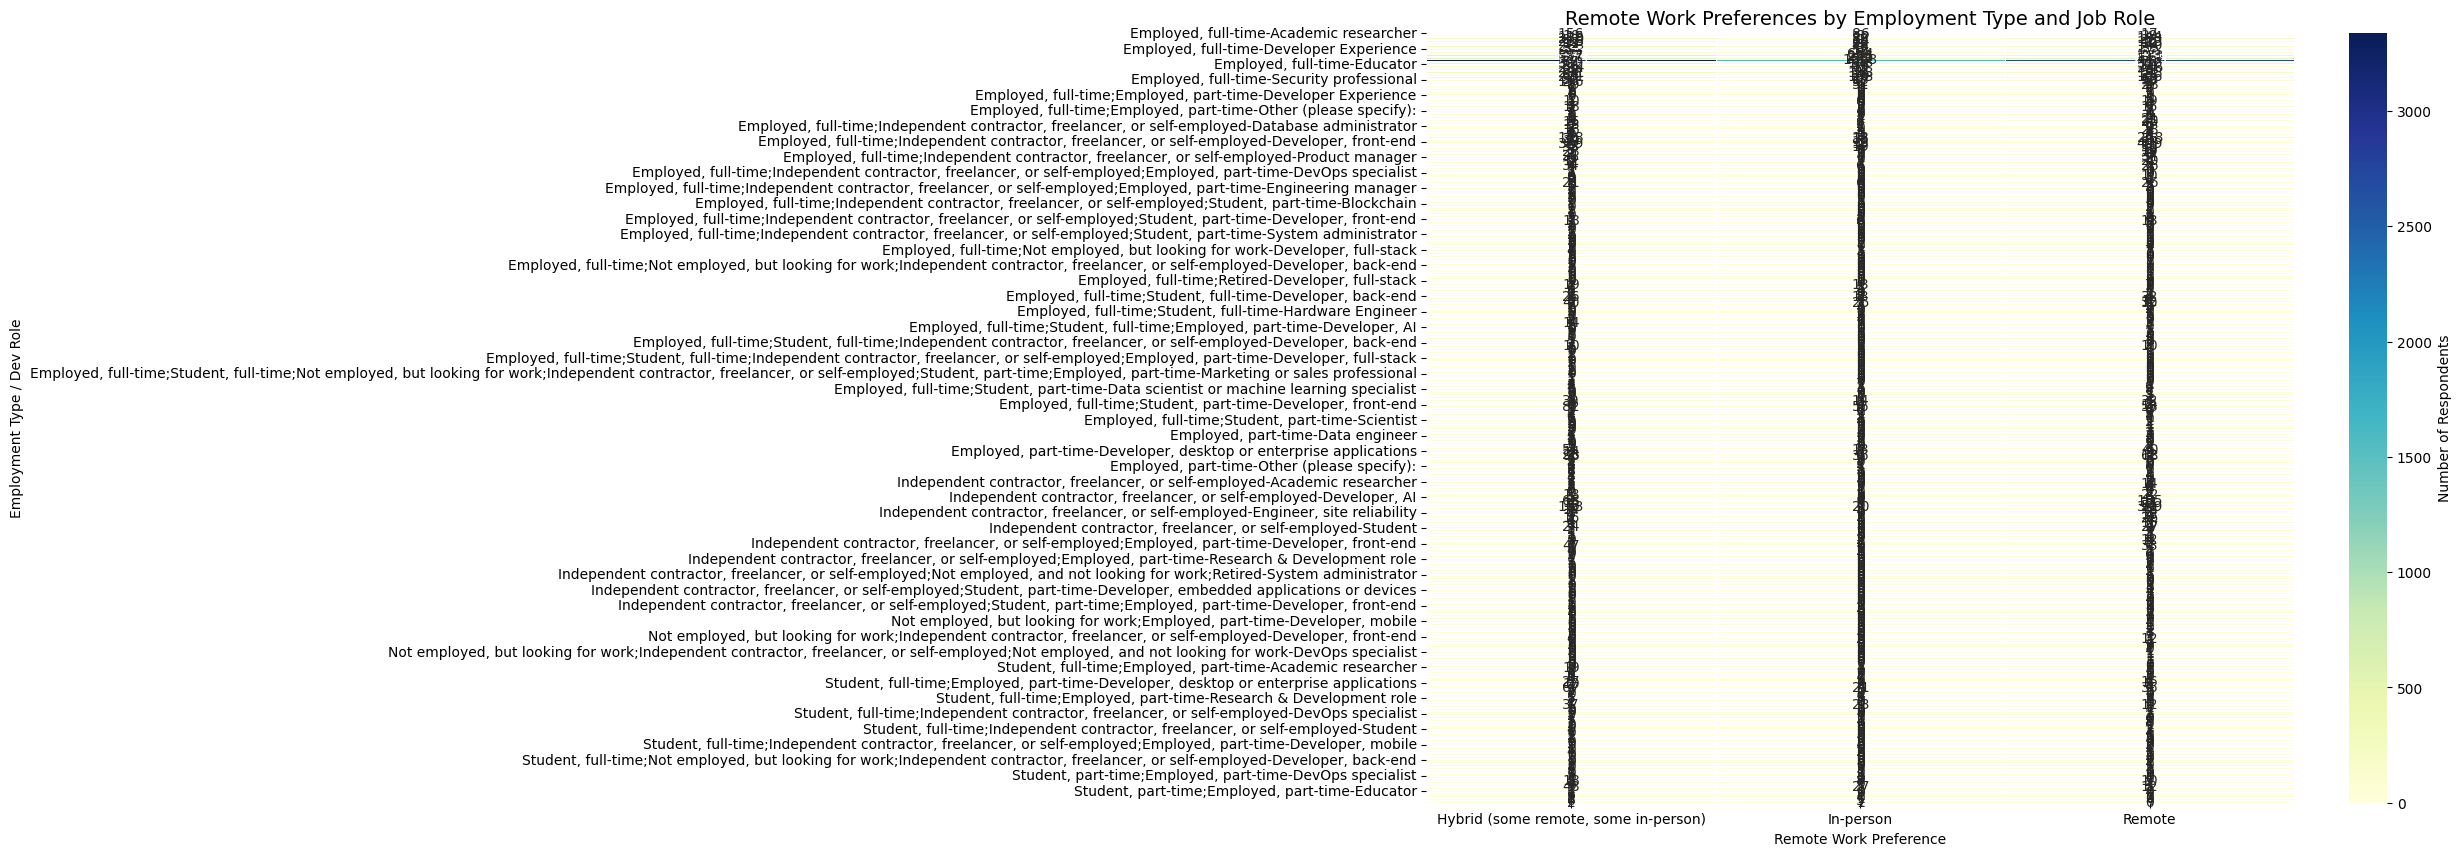

In [37]:
# Remove 'Total' row and column for cleaner visualization
heatmap_data = cross_tab.drop(index="Total", errors="ignore")
heatmap_data = heatmap_data.drop(columns="Total", errors="ignore")

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt="d",
    linewidths=0.5,
    cbar_kws={'label': 'Number of Respondents'}
)

plt.title("Remote Work Preferences by Employment Type and Job Role", fontsize=14)
plt.ylabel("Employment Type / Dev Role")
plt.xlabel("Remote Work Preference")
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [40]:
df["Country"].unique()

array(['United States of America', 'Switzerland', 'Germany', 'Ireland',
       'Italy', 'Ukraine', 'Japan', 'Brazil', 'Austria', 'Romania',
       'United Kingdom of Great Britain and Northern Ireland', 'Bulgaria',
       'Turkey', 'Croatia', 'Sweden', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia', 'Poland',
       'Greece', 'India', 'United Republic of Tanzania', 'Sri Lanka',
       'Netherlands', 'Latvia', 'Portugal', 'Singapore', 'China',
       'Philippines', 'Spain', 'Russian Federation', 'Canada',
       'Lithuania', 'Viet Nam', 'Dominican Republic', 'Serbia', 'Morocco',
       'France', 'Taiwan', 'San Marino', 'Tunisia', 'Bangladesh',
       'Nigeria', 'Australia', 'Ecuador', 'Mexico', 'Albania', 'Israel',
       'South Africa', 'Chile', 'Lebanon', 'Iran, Islamic Republic of...',
       'Algeria', 'Bolivia', 'Georgia', 'Saudi Arabia', 'Cyprus',
       'Paraguay', 'Slovenia', 'Costa Rica', 'Norway', 'Jamaica',
       'Denmark', 'Rwanda'

In [43]:
#  Convert the "LanguageHaveWorkedWith" column into separate binary columns**
language_dummies = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
#  Group by country and sum the language counts**
language_counts = df[['Country']].join(language_dummies).groupby('Country').sum()
language_counts

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2,1,1,3,2,2,3,1,1,2,4,1,1,1,1,1,2,1,2,11,1,2,10,1,2,1,1,2,2,1,1,1,8,1,2,1,9,1,1,1,9,1,1,1,7,3,1,2,1
Albania,0,0,1,3,3,4,1,0,0,0,0,1,0,0,0,0,0,0,0,10,0,6,11,0,1,0,0,1,0,0,0,1,6,0,2,0,2,0,0,0,8,0,0,0,5,0,0,0,0
Algeria,1,0,1,2,1,3,0,0,0,0,4,2,0,0,0,0,0,0,0,15,0,3,14,0,2,0,0,0,0,0,0,0,7,1,1,0,11,0,0,0,12,0,0,1,10,1,0,0,1
Andorra,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0
Angola,2,1,1,2,1,2,0,1,0,0,2,1,0,0,0,1,0,0,0,3,0,2,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",0,0,1,8,4,9,6,0,0,0,1,2,1,1,1,1,1,2,1,23,0,8,28,0,2,0,4,2,0,0,0,0,13,0,5,0,9,1,1,1,18,1,0,1,13,3,4,0,0
Viet Nam,0,0,6,32,24,32,30,1,1,0,10,0,2,0,0,0,1,21,7,65,1,55,84,0,15,1,8,7,1,0,0,5,22,2,18,0,54,6,5,12,66,4,2,9,61,4,0,0,1
Yemen,0,0,0,0,1,1,1,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,2,0,1,0,0


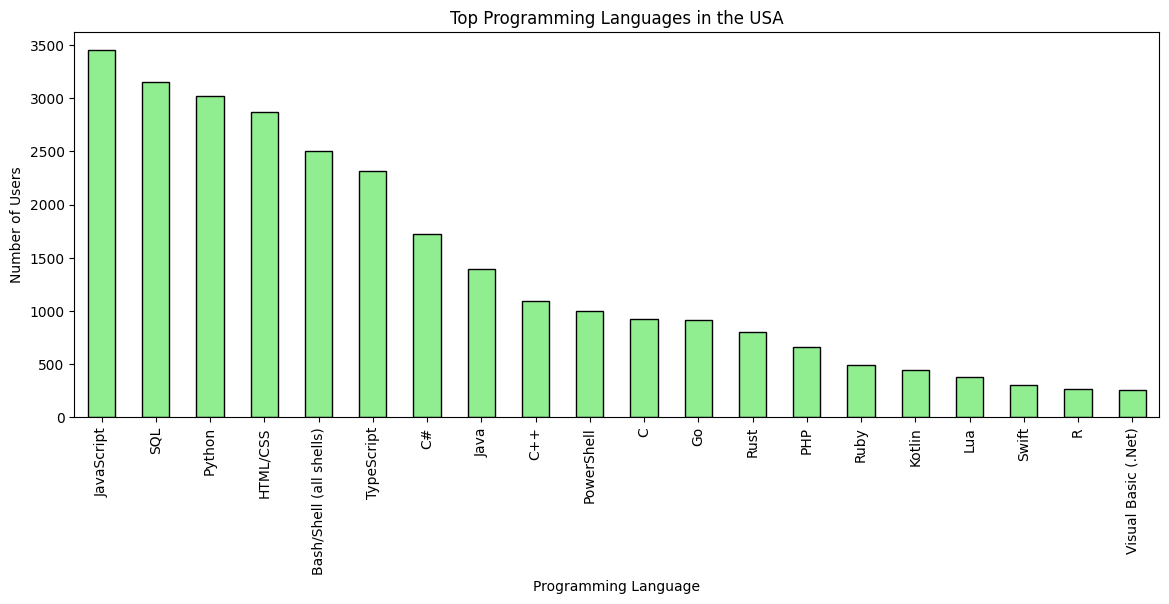

In [44]:
#  Bar Plot for One Country (e.g., USA)
top_20_lang = language_counts.loc['United States of America'].sort_values(ascending=False)[:20]

plt.figure(figsize=(14, 5))
top_15_lang.plot(kind='bar', color='lightgreen', edgecolor="black")

plt.xlabel("Programming Language")
plt.ylabel("Number of Users")
plt.title("Top Programming Languages in the USA")
plt.xticks(rotation=90)
plt.show()

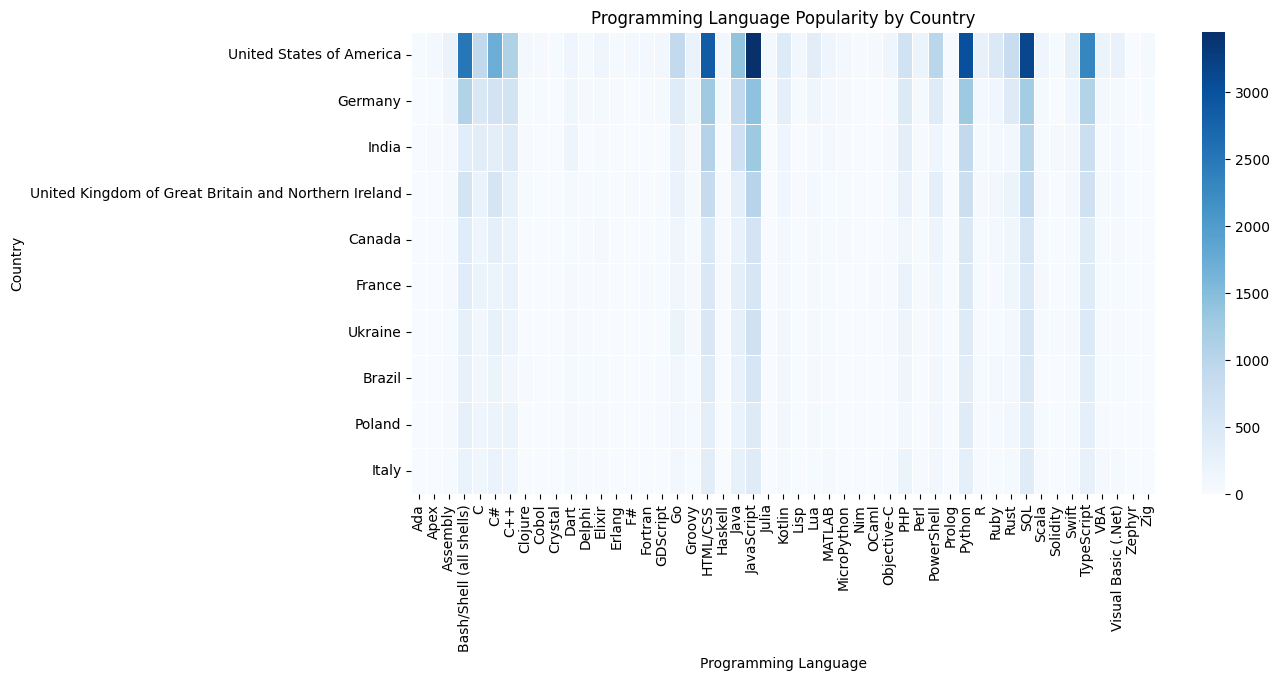

In [51]:
# **4. Heatmap for 10 Regions**
plt.figure(figsize=(12, 6))
top_countries = language_counts.sum(axis=1).nlargest(10).index  # Top 10 countries
#Alternate code for top 10 countries
#     top = language_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_data = language_counts.loc[top_countries]

sns.heatmap(filtered_data, cmap="Blues", linewidths=0.5)

plt.xlabel("Programming Language")
plt.ylabel("Country")
plt.title("Programming Language Popularity by Country")
plt.show()




#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [54]:
correlation = df["YearsCodePro"].corr(df["JobSatPoints_1"])
print(correlation)


-0.031725936964971856


/tmp/ipykernel_298/2977415523.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


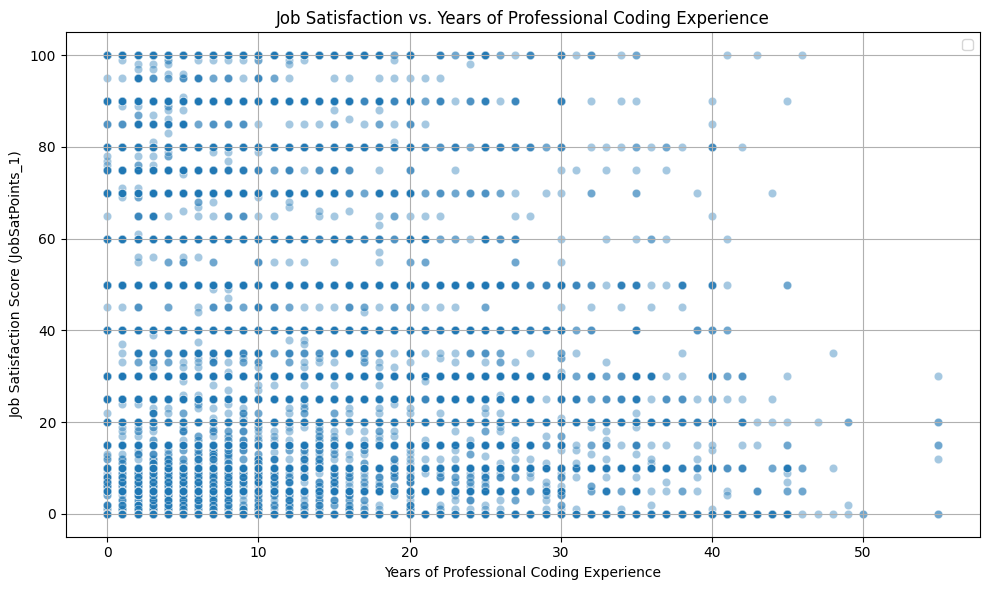

In [56]:
plt.figure(figsize=(10, 6))

# Scatter plot with trend line
sns.scatterplot(data=df, x="YearsCodePro", y="JobSatPoints_1", alpha=0.4)

plt.title("Job Satisfaction vs. Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score (JobSatPoints_1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [57]:
# using crosstab to view educational background (EdLevel) relation to employment type (Employment)
edu_emp_ct = pd.crosstab(df["EdLevel"], df["Employment"],margins=True, margins_name="Total")
edu_emp_ct

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Employed, part-time;Retired","Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed;Employed, part-time","Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired","Independent contractor, freelancer, or self-employed;Retired","Independent contractor, freelancer, or self-employed;Student, part-time","Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Not employed, and not looking for work;Employed, part-time","Not employed, but looking for work","Not employed, but looking for work;Employed, part-time","Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-tim

In [72]:
employment_dummies = df["Employment"].str.get_dummies(sep=';')
employment_count = df[["EdLevel"]].join(employment_dummies).groupby('EdLevel').sum()
employment_count

,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",792,58,131,1,2,1,37,48
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11797,681,1679,4,62,3,375,381
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7401,382,1195,7,32,4,137,161
Primary/elementary school,109,18,28,1,1,1,12,5
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",1245,64,173,1,4,5,13,18
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1092,264,296,0,16,0,211,94
Some college/university study without earning a degree,2790,291,645,4,13,6,196,192
Something else,249,24,49,1,3,2,10,16


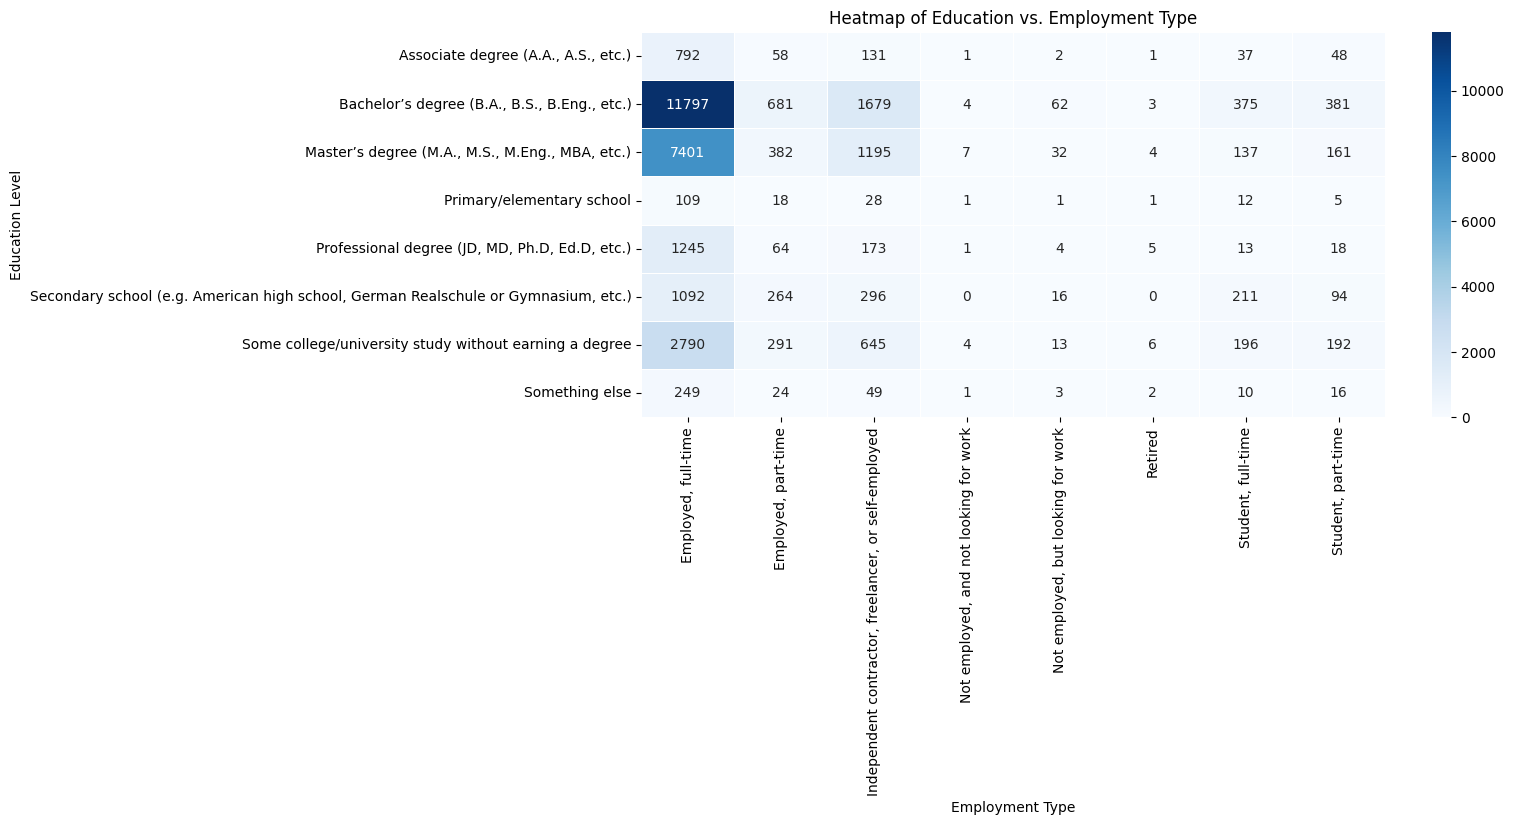

In [67]:
# Heatmap for visualization
plt.figure(figsize=(12, 5))
sns.heatmap(employment_count, cmap="Blues", linewidths=0.5, annot=True, fmt='d')

plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.title("Heatmap of Education vs. Employment Type")

plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [74]:
#save the modified dataset
df.to_csv("modified_dataset.csv", index=False)

In [77]:
#checking if the file has been saved 
test_df = pd.read_csv("modified_dataset.csv")
pd.set_option('display.max_columns', None)
print(test_df.head(5))

   ResponseId                                         MainBranch  \
0          13                     I am a developer by profession   
1          16                     I am a developer by profession   
2          19                     I am a developer by profession   
3          21  I am not primarily a developer, but I write co...   
4          23                     I am a developer by profession   

               Age           Employment                            RemoteWork  \
0  35-44 years old  Employed, full-time  Hybrid (some remote, some in-person)   
1  45-54 years old  Employed, full-time  Hybrid (some remote, some in-person)   
2  25-34 years old  Employed, full-time  Hybrid (some remote, some in-person)   
3  25-34 years old  Employed, full-time  Hybrid (some remote, some in-person)   
4  45-54 years old  Employed, full-time                                Remote   

    Check                                   CodingActivities  \
0  Apples  Hobby;Contribute to open-sour